## This is the 2-layer neural network notebook for ECE C147/C247 Homework #3

Please follow the notebook linearly to implement a two layer neural network.

Please print out the notebook entirely when completed.

The goal of this notebook is to give you experience with training a two layer neural network.

In [2]:
import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass. Make sure to read the description of TwoLayerNet class in neural_net.py file , understand the architecture and initializations

In [5]:
from nndl.neural_net import TwoLayerNet

In [6]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [30]:
## Implement the forward pass of the neural network.
## See the loss() method in TwoLayerNet class for the same

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.381231222787662e-08


In [ ]:
np.exp(0.18878976)/(np.exp(0.18878976)+np.exp(0.5806074))

In [7]:
A = np.array([[3,4,5],
              [5,2,4],
              [3,3,7]])

In [8]:
(A>=4)*A

array([[0, 4, 5],
       [5, 0, 4],
       [0, 0, 7]])

In [12]:
A/A.sum(axis=1)[:,np.newaxis]

array([[0.25      , 0.33333333, 0.41666667],
       [0.45454545, 0.18181818, 0.36363636],
       [0.23076923, 0.23076923, 0.53846154]])

In [20]:
A/13

array([[0.23076923, 0.30769231, 0.38461538],
       [0.38461538, 0.15384615, 0.30769231],
       [0.23076923, 0.23076923, 0.53846154]])

### Forward pass loss

In [81]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.071696123862817

# should be very small, we get < 1e-12
print("Loss:",loss)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Loss: 1.071696123862817
Difference between your loss and correct loss:
0.0


In [ ]:
loss = (-np.log((np.exp((self.W[y]*X).sum(axis=1))/(np.exp(X@self.W.T).sum(axis=1))))).mean()

In [128]:
W1 = net.params["W1"]
b1 = net.params["b1"]
W2 = net.params["W2"]
b2 = net.params["b2"]
N, D = X.shape

In [35]:
z1 = W1@(X.T) + b1[:,np.newaxis] # (H x D) x (D x N) = (H x N)
h1 = (z1 >= 0)*z1 # ReLU
z2 = W2@h1 + b2[:,np.newaxis]  # (C x H) x (H x N) = (C x N)
scores = z2.T

In [37]:
y

array([0, 1, 2, 2, 1])

In [38]:
z2.T[y]

array([[-1.07260209,  0.05083871, -0.87253915],
       [-2.02778743, -0.10832494, -1.52641362],
       [-0.74225908,  0.15259725, -0.39578548],
       [-0.74225908,  0.15259725, -0.39578548],
       [-2.02778743, -0.10832494, -1.52641362]])

In [49]:
loss = (-np.log((np.exp(z2.T[y].sum(axis=1))/(np.exp(z2.T).sum(axis=1))))).mean()
loss

2.9030078573397917

In [46]:
np.exp(z2.T).sum(axis=1)

array([1.81215943, 1.24627604, 2.31404411, 2.63802883, 2.01593346])

In [53]:
np.log(np.exp(z2.T).sum(axis=1)).mean()

0.6649580301586279

In [60]:
z2.T

array([[-1.07260209,  0.05083871, -0.87253915],
       [-2.02778743, -0.10832494, -1.52641362],
       [-0.74225908,  0.15259725, -0.39578548],
       [-0.38172726,  0.10835902, -0.17328274],
       [-0.64417314, -0.18886813, -0.41106892]])

In [58]:
y

array([0, 1, 2, 2, 1])

In [66]:
z2.T[np.arange(len(z2.T)), y]

array([-1.07260209, -0.10832494, -0.39578548, -0.17328274, -0.18886813])

In [77]:
np.log(np.exp(z2.T).sum(axis=1)).mean() - z2.T[np.arange(len(z2.T)), y].mean() + 0.05*0.5*(np.linalg.norm(W1, ord='fro')**2 + np.linalg.norm(W2, ord='fro')**2)

1.071696123862817

In [82]:
dL_dz2 = np.ones_like(z2)

In [87]:
np.ones_like(z2.T)/z2.T.sum(axis=1)[:,np.newaxis]

array([[-0.52789878, -0.52789878, -0.52789878],
       [-0.27303561, -0.27303561, -0.27303561],
       [-1.01476759, -1.01476759, -1.01476759],
       [-2.23888462, -2.23888462, -2.23888462],
       [-0.80378733, -0.80378733, -0.80378733]])

In [89]:
z2.T

array([[-1.07260209,  0.05083871, -0.87253915],
       [-2.02778743, -0.10832494, -1.52641362],
       [-0.74225908,  0.15259725, -0.39578548],
       [-0.38172726,  0.10835902, -0.17328274],
       [-0.64417314, -0.18886813, -0.41106892]])

In [90]:
y

array([0, 1, 2, 2, 1])

In [91]:
z2.T[np.arange(len(z2.T)), y]

array([-1.07260209, -0.10832494, -0.39578548, -0.17328274, -0.18886813])

### Backward pass

Implements the backwards pass of the neural network.  Check your gradients with the gradient check utilities provided.

In [178]:
from utils.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))
#     print(param_grad_num)

b2 max relative error: 1.8392106647421603e-10
W2 max relative error: 3.4254767397498007e-10
b1 max relative error: 3.1726804786908923e-09
W1 max relative error: 1.2832908996874818e-09


In [168]:
a = np.zeros_like(z2.T)
a[np.arange(len(z2.T)), y]=1
dL_dz2 = (np.exp(z2.T)/np.exp(z2.T).sum(axis=1)[:,np.newaxis] - a).T
dL_db2 = dL_dz2.sum(axis=1)
dL_dv2 = dL_dz2
dL_dW2 = dL_dv2@h1.T
dL_dh1 = W2.T@dL_dv2
dL_dz1 = (h1 > 0)*dL_dh1 # Right? No, you moron
dL_db1 = dL_dz1.sum(axis=1)
dL_dv1 = dL_dz1
dL_dW1 = dL_dv1@X

dL_db2 /= N
dL_dW2 /= N
dL_db1 /= N
dL_dW1 /= N

dL_dW2 += 

In [169]:
dL_db2

array([ 0.00387598,  0.12742746, -0.13130344])

In [167]:
dL_dz2

array([[-0.44817217,  0.80239045,  0.43214388,  0.37907091,  0.49604812],
       [ 0.55182783, -0.19760955,  0.43214388,  0.37907091, -0.50395188],
       [ 0.55182783,  0.80239045, -0.56785612, -0.62092909,  0.49604812]])

In [92]:
np.ones_like(z2.T)/z2.T.sum(axis=1)[:,np.newaxis]

array([[-0.52789878, -0.52789878, -0.52789878],
       [-0.27303561, -0.27303561, -0.27303561],
       [-1.01476759, -1.01476759, -1.01476759],
       [-2.23888462, -2.23888462, -2.23888462],
       [-0.80378733, -0.80378733, -0.80378733]])

In [132]:
np.log(np.exp(z2.T).sum(axis=1)).mean() - z2.T[np.arange(len(z2.T)), y].mean() \
+ 0.05*0.5*(np.linalg.norm(W1, ord='fro')**2 + np.linalg.norm(W2, ord='fro')**2)

1.071696123862817

In [163]:
1/z2.T[0,:].sum()

-0.5278987826812709

In [140]:
z2.T

array([[-1.07260209,  0.05083871, -0.87253915],
       [-2.02778743, -0.10832494, -1.52641362],
       [-0.74225908,  0.15259725, -0.39578548],
       [-0.38172726,  0.10835902, -0.17328274],
       [-0.64417314, -0.18886813, -0.41106892]])

In [151]:
np.ones_like(z2.T)/z2.T.sum(axis=1)[:,np.newaxis]

array([[-0.52789878, -0.52789878, -0.52789878],
       [-0.27303561, -0.27303561, -0.27303561],
       [-1.01476759, -1.01476759, -1.01476759],
       [-2.23888462, -2.23888462, -2.23888462],
       [-0.80378733, -0.80378733, -0.80378733]])

In [175]:
1*(h1 > 0)

array([[0, 1, 0, 0, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1],
       [1, 0, 1, 0, 0]])

In [155]:
np.ones_like(z2.T)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [160]:
z2.T[0,:].sum()

-1.8943025307254202

In [162]:
z2.T.sum(axis=1)[:,np.newaxis]

array([[-1.89430253],
       [-3.66252599],
       [-0.98544731],
       [-0.44665098],
       [-1.24411018]])

In [177]:
(h1 > 0)*dL_dh1

array([[ 0.        ,  0.00227173, -0.        , -0.        ,  0.00334608],
       [ 0.12936576, -0.03209991,  0.01575996,  0.00409118, -0.07161268],
       [ 0.        , -0.        , -0.        , -0.        , -0.04108117],
       [-0.26660584,  0.02355808,  0.10311043,  0.        ,  0.        ],
       [ 0.04379872, -0.00149988, -0.02448436, -0.02646655, -0.        ],
       [ 0.        , -0.        ,  0.04104004,  0.03412929, -0.        ],
       [ 0.06789724, -0.04351972,  0.09317397,  0.08144516, -0.09016117],
       [-0.03483718,  0.        , -0.        ,  0.        ,  0.        ],
       [ 0.        , -0.01510576, -0.        , -0.00675369, -0.03449216],
       [-0.00260544,  0.        , -0.02631973, -0.        ,  0.        ]])

### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the softmax and SVM.

Final training loss:  0.013338037215396807


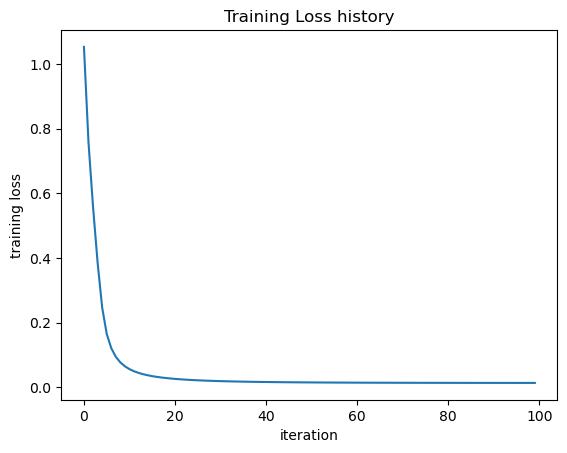

In [182]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [184]:
from utils.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. 
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/home/andrea/git/UCLA/UCLA_ECE147/cifar-10-batches-py' # remember to use correct path
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 28-29%.

In [189]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 2.3027781109127994
iteration 100 / 1000: loss 2.3023051866249236
iteration 200 / 1000: loss 2.2971832381421646
iteration 300 / 1000: loss 2.2672203812398948
iteration 400 / 1000: loss 2.1834964063436906
iteration 500 / 1000: loss 2.162807507433956
iteration 600 / 1000: loss 2.077024585250963
iteration 700 / 1000: loss 1.9925966641437924
iteration 800 / 1000: loss 1.9871874501072693
iteration 900 / 1000: loss 1.9944860279554801
Validation accuracy:  0.28


## Questions:

The training accuracy isn't great.  

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?


In [190]:
stats['train_acc_history']

[0.11, 0.155, 0.255, 0.33, 0.21]

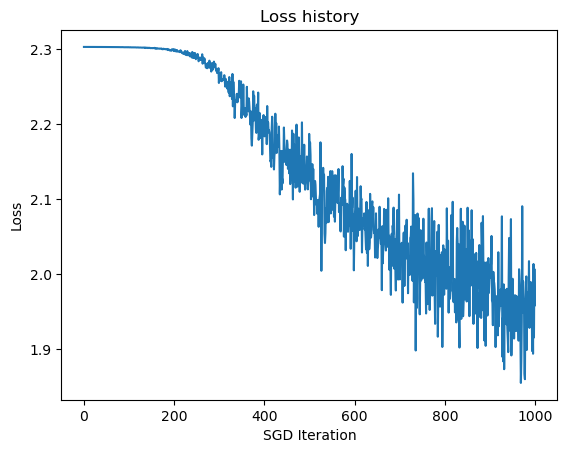

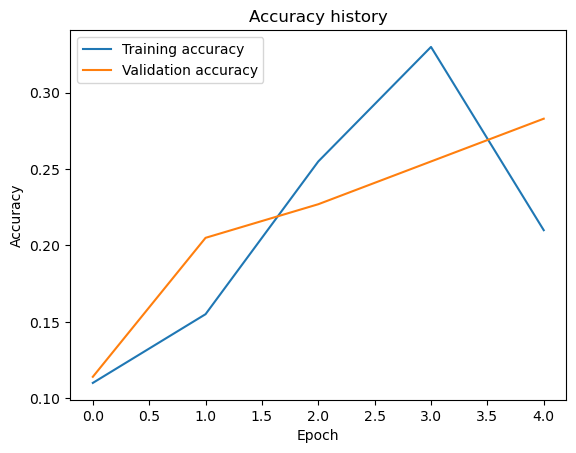

In [196]:
# ================================================================ #
# YOUR CODE HERE:
#   Do some debugging to gain some insight into why the optimization
#   isn't great.
# ================================================================ #

# Plot the loss function and train / validation accuracies
plt.title("Loss history")
plt.plot(np.arange(len(stats['loss_history'])), stats['loss_history'])
plt.xlabel("SGD Iteration")
plt.ylabel("Loss")
plt.show()
plt.title("Accuracy history")
plt.plot(np.arange(len(stats['train_acc_history'])), stats['train_acc_history'], label="Training accuracy")
plt.plot(np.arange(len(stats['val_acc_history'])), stats['val_acc_history'], label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Answers:

(1) Towards the beginning of the loss history, loss stays roughly constant, indicating that the initial learning rate is too low. Interestingly, between epohs 3 and 4, training accuracy decreases as validation accuracy increases, the opposite of overfitting. Further, while loss is noisy, it does decrease somewhat linearly. This would suggest that the model could benefit from more training.

(2) I would change the hyperparameters of the network.

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

In [202]:
def f(a):
    x, y = a
    return x**2 + y**2

opt.minimize(f, [10,20], method='Nelder-Mead', tol=1e-6)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 2.0269230294639122e-13
             x: [ 3.391e-07 -2.962e-07]
           nit: 65
          nfev: 124
 final_simplex: (array([[ 3.391e-07, -2.962e-07],
                       [-1.745e-07,  5.853e-07],
                       [-6.176e-07, -4.251e-07]]), array([ 2.027e-13,  3.730e-13,  5.622e-13]))

In [229]:
best_net = None # store the best model into this 

# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 50% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 28%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #

best_pred = 0.0
# net = None

def nn_loss(args):
    global best_net, best_pred
    learning_rate, learning_rate_decay, reg = args
    
    net = TwoLayerNet(input_size, hidden_size, num_classes)

    # Train the network
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=2250, batch_size=500,
            learning_rate=learning_rate, learning_rate_decay=learning_rate_decay,
            reg=reg, verbose=False)
    val_acc = (net.predict(X_val) == y_val).mean()
    print('Training accuracy: ', val_acc)
    if (val_acc > best_pred):
        best_net = net
        best_pred = val_acc
    return -val_acc

result = opt.minimize(nn_loss, [5e-4,0.95,0.2],
                      method='Nelder-Mead',
                      tol=1e-4,
                      options={"maxiter": 10},
                      bounds=[(0,1),(0,1),(0,1)])

# best_net = TwoLayerNet(input_size, hidden_size, num_classes)

# # Train the network
# stats = best_net.train(X_train, y_train, X_val, y_val,
#         num_iters=2250, batch_size=500,
#         learning_rate=result["x"][0], learning_rate_decay=result["x"][1],
#         reg=result["x"][2], verbose=False)

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Training accuracy:  0.472
Training accuracy:  0.473
Training accuracy:  0.483
Training accuracy:  0.467
Training accuracy:  0.486
Training accuracy:  0.497
Training accuracy:  0.494
Training accuracy:  0.488
Training accuracy:  0.496
Training accuracy:  0.486
Training accuracy:  0.493
Training accuracy:  0.499
Training accuracy:  0.489
Training accuracy:  0.517
Training accuracy:  0.499
Training accuracy:  0.504
Training accuracy:  0.511
Validation accuracy:  0.517


In [230]:
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Validation accuracy:  0.517


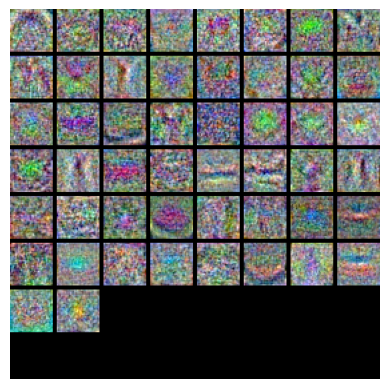

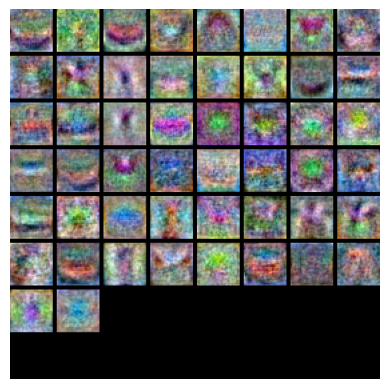

In [231]:
from utils.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

## Question:

(1) What differences do you see in the weights between the suboptimal net and the best net you arrived at?

## Answer:

(1) The suboptimal weights, when represented as images, are a lot more blurry, whereas the more optimal ones create clearer and more concise "images" 

## Evaluate on test set 

In [232]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.487
